In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, mean_absolute_percentage_error, r2_score

sns.set(rc={'figure.figsize':(20,20)})

current_dir = os.path.abspath('')
parent_dir = os.path.dirname(current_dir)

In [2]:
regions_data = pd.read_csv(os.path.join(parent_dir, 'datasets', 'region-economics-prediction', 'train.csv'))
regions_data.loc[32, 'x59'] = 0.0
regions_data.loc[20, 'x4'] = 4379
regions_data['x4'] = regions_data['x4'].astype('float64')
regions_data['x59'] = regions_data['x59'].astype('float64')
regions_data['x58'] = regions_data['x58'].astype('float64')

#regions_data.info()

# проверка на NaN-ы
for i in regions_data.columns:
    if regions_data[i].isnull().values.any():
        print(i)
        regions_data[i].fillna(regions_data[i].mean(), axis=0, inplace=True)

x38
x59
x60


<Axes: >

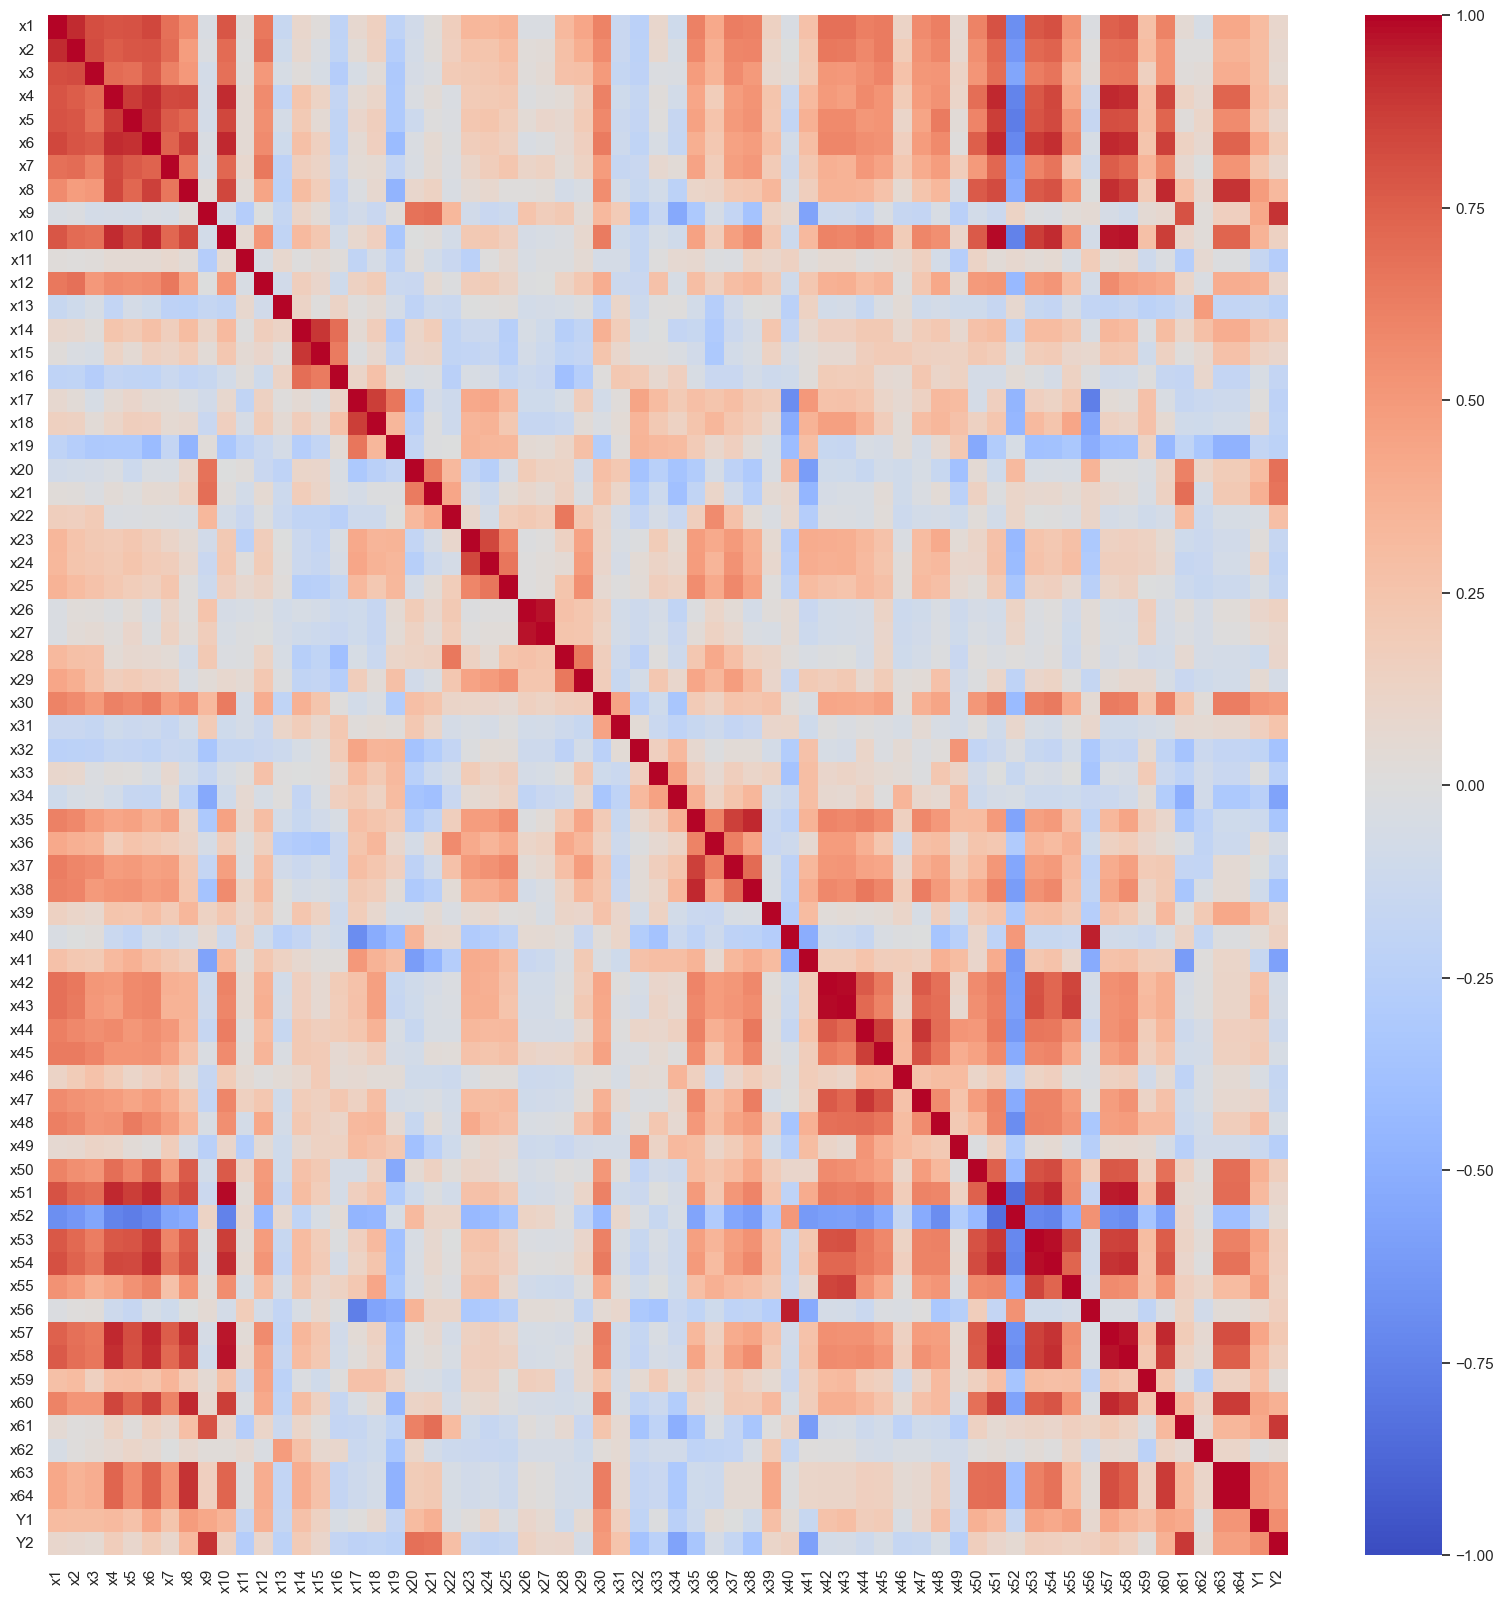

In [3]:
sns.heatmap(regions_data.corr(), vmin=-1, vmax=1, center=0, cmap='coolwarm')

In [4]:
regions_data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x57,x58,x59,x60,x61,x62,x63,x64,Y1,Y2
0,32.0,60.0,15.0,1871.0,56.0,6.0,10.0,0.0,58653.95,176.4,...,175.0,311667.0,154.27,18.48,27338.4,99.9,74199.0,1002.69,0,1252.25
1,14.0,7.0,2.0,585.0,2.0,2.0,4.0,2.0,34613.83,848.0,...,559.0,1497992.0,109.64,1.54,17209.5,112.9,-7194.0,-97.22,0,418.14
2,42.0,131.0,32.0,3369.0,102.0,15.0,38.0,15.0,36801.25,719.6,...,579.5,1207875.0,251.65,7.39,15966.3,99.3,19263.0,260.31,0,480.15
3,48.0,89.0,14.0,2630.0,183.0,20.0,1.0,1.0,37973.60,732.0,...,500.2,1098257.0,229.92,10.30,17529.3,94.9,64773.0,875.31,0,544.36
4,14.0,49.0,3.0,698.0,55.0,2.0,9.0,3.0,33297.72,149.8,...,122.7,269984.0,87.40,1.61,17571.8,96.7,2268.0,30.65,0,448.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,135.0,154.0,33.0,6216.0,447.0,48.0,114.0,10.0,49722.15,815.6,...,515.7,1082662.0,102.36,9.80,20201.0,126.9,28204.0,381.14,0,771.30
64,72.0,234.0,24.0,5516.0,161.0,34.0,110.0,29.0,58046.47,904.4,...,893.1,1687654.0,545.90,23.07,19799.1,110.6,1265422.0,17100.30,1,1151.50
65,132.0,376.0,81.0,23664.0,676.0,125.0,159.0,35.0,38877.22,1619.8,...,1349.0,2785836.0,301.91,37.53,17726.7,111.9,175754.0,2375.05,0,627.63
66,90.0,140.0,16.0,9047.0,387.0,30.0,77.0,15.0,38654.35,800.4,...,619.9,1245619.0,264.48,15.32,17109.5,100.0,30067.0,406.31,0,536.38


In [5]:
regions_final_test_data = pd.read_csv(os.path.join(parent_dir, 'datasets', 'region-economics-prediction', 'test.csv'))
regions_final_test_data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,132.0,473.0,57.0,12201,461.0,78.0,85.0,17.0,40450.05,1032.4,...,-310.0,9.15,960.6,1877844.0,120.69,12.55,20830.5,75.0,225557.0,3048.07
1,51.0,125.0,26.0,4734,166.0,22.0,77.0,1.0,39120.38,998.2,...,6436.0,7.72,794.5,1541259.0,175.28,13.76,16022.7,108.6,935400.0,12640.54
2,236.0,672.0,164.0,17540,671.0,89.0,180.0,26.0,42361.80,1650.0,...,11896.0,9.96,1410.6,2855899.0,201.41,15.28,18681.1,106.0,1123004.0,15175.73
3,73.0,186.0,20.0,6931,262.0,31.0,74.0,6.0,41227.90,721.8,...,-885.0,8.83,530.5,1151042.0,402.10,12.29,18625.2,98.7,712351.0,9626.36
4,58.0,104.0,12.0,4851,350.0,27.0,67.0,13.0,37321.88,580.4,...,1410.0,6.56,456.2,921127.0,185.09,9.70,17259.5,82.0,44377.0,599.69
5,39.0,110.0,12.0,2604,94.0,21.0,21.0,12.0,52172.70,318.2,...,705.0,11.22,260.7,485621.0,143.96,15.82,21532.6,89.4,403023.0,5446.26
6,29.0,63.0,7.0,2577,153.0,16.0,16.0,10.0,38307.22,519.0,...,-969.0,7.28,333.7,724686.0,311.61,5.70,15755.2,107.1,48430.0,654.46
7,58.0,101.0,21.0,5852,421.0,25.0,66.0,17.0,48604.38,456.2,...,1323.0,8.28,275.5,609071.0,145.57,6.43,19293.9,108.0,142046.0,1919.54
8,49.0,111.0,26.0,4498,263.0,38.0,60.0,16.0,37751.68,615.0,...,2680.0,7.33,502.3,987032.0,240.02,9.49,17277.4,100.3,13287.0,179.55
9,40.0,125.0,22.0,3736,182.0,17.0,64.0,5.0,39021.40,300.4,...,-432.0,9.85,238.3,532036.0,207.97,1.77,18009.7,105.2,46958.0,634.57


In [6]:
#pca = PCA(n_components=30)
train_data = regions_data.drop(['Y1','Y2'], axis=1)
#train_data = pca.fit_transform(train_data)
#regions_final_test_data = pca.fit_transform(regions_final_test_data)

In [7]:
extra_trees_model = ExtraTreesRegressor(n_estimators=10000)
extra_trees_model.fit(train_data, regions_data['Y1'])
data_test_pred = extra_trees_model.predict(regions_final_test_data)
data_test_pred

array([3.570e-02, 3.519e-01, 7.492e-01, 2.575e-01, 1.100e-02, 8.610e-02,
       1.490e-02, 2.870e-02, 2.000e-04, 1.400e-03, 2.500e-02, 4.148e-01,
       1.394e-01, 1.000e-04, 4.920e-02, 8.000e-04, 4.200e-03])

In [8]:
extra_trees_model = ExtraTreesRegressor(n_estimators=10000)
extra_trees_model.fit(train_data, regions_data['Y2'])
data_test_pred = extra_trees_model.predict(regions_final_test_data)
data_test_pred


array([ 733.291021,  574.34263 ,  764.146394,  664.820017,  518.926572,
       1041.121697,  500.311612,  787.094057,  505.494757,  527.105522,
        466.825794,  588.769292,  544.336999,  526.864651,  569.333562,
        496.96879 ,  497.80574 ])

In [9]:
data_train, data_test = train_test_split(regions_data, test_size=0.2, random_state=42)

In [10]:
# StandardScaler
def preprocessing(df):
    x = df.drop(['Y1','Y2'], axis=1)
    y = df['Y1']
    sc = StandardScaler()
    sc.fit_transform(x)
    #pca = PCA(n_components=8)
    #x = pca.fit_transform(x)
    return x, y

X_train, Y_train = data_train.drop(['Y1','Y2'], axis=1), data_train['Y1']
X_test, Y_test = data_test.drop(['Y1','Y2'], axis=1), data_test['Y1']
X_train

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
54,63.0,95.0,39.0,1553.0,51.0,31.0,53.0,24.0,29918.62,1347.4,...,-3499.0,13.79,1162.9,3133303.0,32.500000,4.460000,17041.1,80.8,-5302.0,-71.65
55,15.0,39.0,10.0,1290.0,41.0,11.0,13.0,0.0,34677.10,244.2,...,7897.0,9.27,185.2,463167.0,223.210000,2.600000,16651.9,111.6,7401.0,100.01
49,218.0,514.0,85.0,28899.0,888.0,140.0,211.0,66.0,36743.78,3243.8,...,40643.0,10.24,2677.5,5683947.0,230.680000,60.930000,18803.3,109.0,585626.0,7913.86
7,324.0,830.0,129.0,24523.0,1631.0,281.0,132.0,115.0,42409.85,3950.2,...,113041.0,9.22,3998.9,7708499.0,575.390000,144.910000,20276.5,117.5,1131842.0,15295.16
42,44.0,57.0,7.0,4318.0,205.0,14.0,52.0,14.0,39247.10,385.6,...,2261.0,7.76,286.3,592415.0,139.720000,5.510000,16731.8,105.2,131889.0,1782.28
31,27.0,56.0,13.0,2744.0,124.0,19.0,21.0,4.0,37743.97,403.8,...,28.0,7.66,294.9,628423.0,243.930000,7.300000,16985.5,99.5,19934.0,269.38
36,31.0,65.0,10.0,2268.0,107.0,11.0,48.0,4.0,36143.20,490.2,...,891.0,6.58,404.4,778965.0,325.820000,5.320000,15618.3,115.0,34190.0,462.03
19,78.0,223.0,49.0,10782.0,434.0,47.0,81.0,10.0,36289.97,1424.8,...,-4173.0,7.58,1116.5,2395111.0,340.480000,26.990000,15795.1,99.5,62573.0,845.58
45,82.0,236.0,62.0,11641.0,398.0,64.0,140.0,31.0,35454.18,1440.6,...,2972.0,9.34,1302.7,2792796.0,195.380000,20.900000,18448.1,115.5,137666.0,1860.35
33,45.0,143.0,67.0,9854.0,432.0,36.0,76.0,34.0,36956.00,542.0,...,-5490.0,11.22,474.4,1053485.0,245.760000,8.670000,17994.9,117.7,88227.0,1192.26


In [11]:
random_forest_model = RandomForestRegressor(n_estimators=100)
random_forest_model.fit(X_train, Y_train)
data_test_pred = random_forest_model.predict(X_test)
#random_forest_model_accuracy = accuracy_score(Y_test, data_test_pred) * 100
#random_forest_model_f1 = f1_score(Y_test, data_test_pred) * 100
#print(f'Accuracy = {random_forest_model_accuracy} %')
#print(f'F1 Score = {random_forest_model_f1} %')
decision_tree_model = ExtraTreesRegressor(n_estimators=500)
decision_tree_model.fit(X_train, Y_train)
data_test_pred = decision_tree_model.predict(X_test)


In [12]:
regions_final_test_data = pd.read_csv(os.path.join(parent_dir, 'datasets', 'region-economics-prediction', 'test.csv'))
regions_final_test_data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,132.0,473.0,57.0,12201,461.0,78.0,85.0,17.0,40450.05,1032.4,...,-310.0,9.15,960.6,1877844.0,120.69,12.55,20830.5,75.0,225557.0,3048.07
1,51.0,125.0,26.0,4734,166.0,22.0,77.0,1.0,39120.38,998.2,...,6436.0,7.72,794.5,1541259.0,175.28,13.76,16022.7,108.6,935400.0,12640.54
2,236.0,672.0,164.0,17540,671.0,89.0,180.0,26.0,42361.80,1650.0,...,11896.0,9.96,1410.6,2855899.0,201.41,15.28,18681.1,106.0,1123004.0,15175.73
3,73.0,186.0,20.0,6931,262.0,31.0,74.0,6.0,41227.90,721.8,...,-885.0,8.83,530.5,1151042.0,402.10,12.29,18625.2,98.7,712351.0,9626.36
4,58.0,104.0,12.0,4851,350.0,27.0,67.0,13.0,37321.88,580.4,...,1410.0,6.56,456.2,921127.0,185.09,9.70,17259.5,82.0,44377.0,599.69
5,39.0,110.0,12.0,2604,94.0,21.0,21.0,12.0,52172.70,318.2,...,705.0,11.22,260.7,485621.0,143.96,15.82,21532.6,89.4,403023.0,5446.26
6,29.0,63.0,7.0,2577,153.0,16.0,16.0,10.0,38307.22,519.0,...,-969.0,7.28,333.7,724686.0,311.61,5.70,15755.2,107.1,48430.0,654.46
7,58.0,101.0,21.0,5852,421.0,25.0,66.0,17.0,48604.38,456.2,...,1323.0,8.28,275.5,609071.0,145.57,6.43,19293.9,108.0,142046.0,1919.54
8,49.0,111.0,26.0,4498,263.0,38.0,60.0,16.0,37751.68,615.0,...,2680.0,7.33,502.3,987032.0,240.02,9.49,17277.4,100.3,13287.0,179.55
9,40.0,125.0,22.0,3736,182.0,17.0,64.0,5.0,39021.40,300.4,...,-432.0,9.85,238.3,532036.0,207.97,1.77,18009.7,105.2,46958.0,634.57


In [13]:
print(random_forest_model.predict(regions_final_test_data))
print(decision_tree_model.predict(regions_final_test_data))

[0.   0.24 0.67 0.22 0.02 0.   0.   0.11 0.   0.   0.   0.45 0.14 0.
 0.01 0.   0.  ]
[0.014 0.308 0.808 0.2   0.004 0.016 0.    0.09  0.    0.    0.    0.426
 0.132 0.    0.024 0.    0.006]


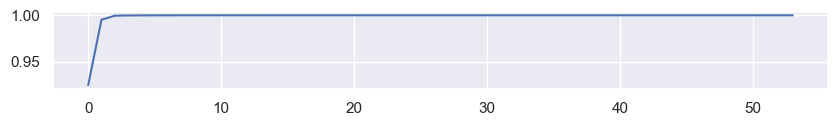

In [14]:
# количество признаков, необходимых для описания дисперсии данных
sample = data_train.drop(['Y1', 'Y2'], axis=1)
pca_sample = PCA()
sample = pca_sample.fit_transform(sample)
plt.figure(figsize=(10,1))
plt.plot(np.cumsum(pca_sample.explained_variance_ratio_))

In [15]:
# StandardScaler и PCA
def preprocessing(df):
    x = df.drop(['Y1','Y2'], axis=1)
    y = df['Y2']
    sc = StandardScaler()
    sc.fit_transform(x)
    pca = PCA(n_components=5)
    x = pca.fit_transform(x)
    return x, y

In [16]:
X_train, Y_train = regions_data.drop(['Y1', 'Y2'], axis=1), regions_data['Y2']
X_test, Y_test = data_test.drop(['Y1', 'Y2'], axis=1), data_test['Y2']

model_0 = KNeighborsRegressor()
model_0.fit(X_train, Y_train)

model_1 = SVR()
model_1.fit(X_train, Y_train)

model_2 = DecisionTreeRegressor()
model_2.fit(X_train, Y_train)

model_3 = RandomForestRegressor(n_estimators=5000, random_state=42)
model_3.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=5000, random_state=42)

In [17]:
print(
    f'r2_score модели {model_0} составляет {r2_score(Y_test, model_0.predict(X_test))}\n'
    f'r2_score модели {model_1} составляет {r2_score(Y_test, model_1.predict(X_test))}\n'
    f'r2_score модели {model_2} составляет {r2_score(Y_test, model_2.predict(X_test))}\n'
    f'r2_score модели {model_3} составляет {r2_score(Y_test, model_3.predict(X_test))}\n'
)

r2_score модели KNeighborsRegressor() составляет 0.6129929928386648
r2_score модели SVR() составляет -0.496330578223519
r2_score модели DecisionTreeRegressor() составляет 1.0
r2_score модели RandomForestRegressor(n_estimators=5000, random_state=42) составляет 0.981498340150653



In [18]:
model_3.predict(regions_final_test_data)

array([ 745.759434,  548.999046,  751.723064,  678.339426,  554.351394,
       1037.989542,  493.796806,  824.951036,  520.476948,  511.350262,
        460.93209 ,  586.63368 ,  542.026194,  543.001102,  558.220018,
        510.684494,  481.358656])

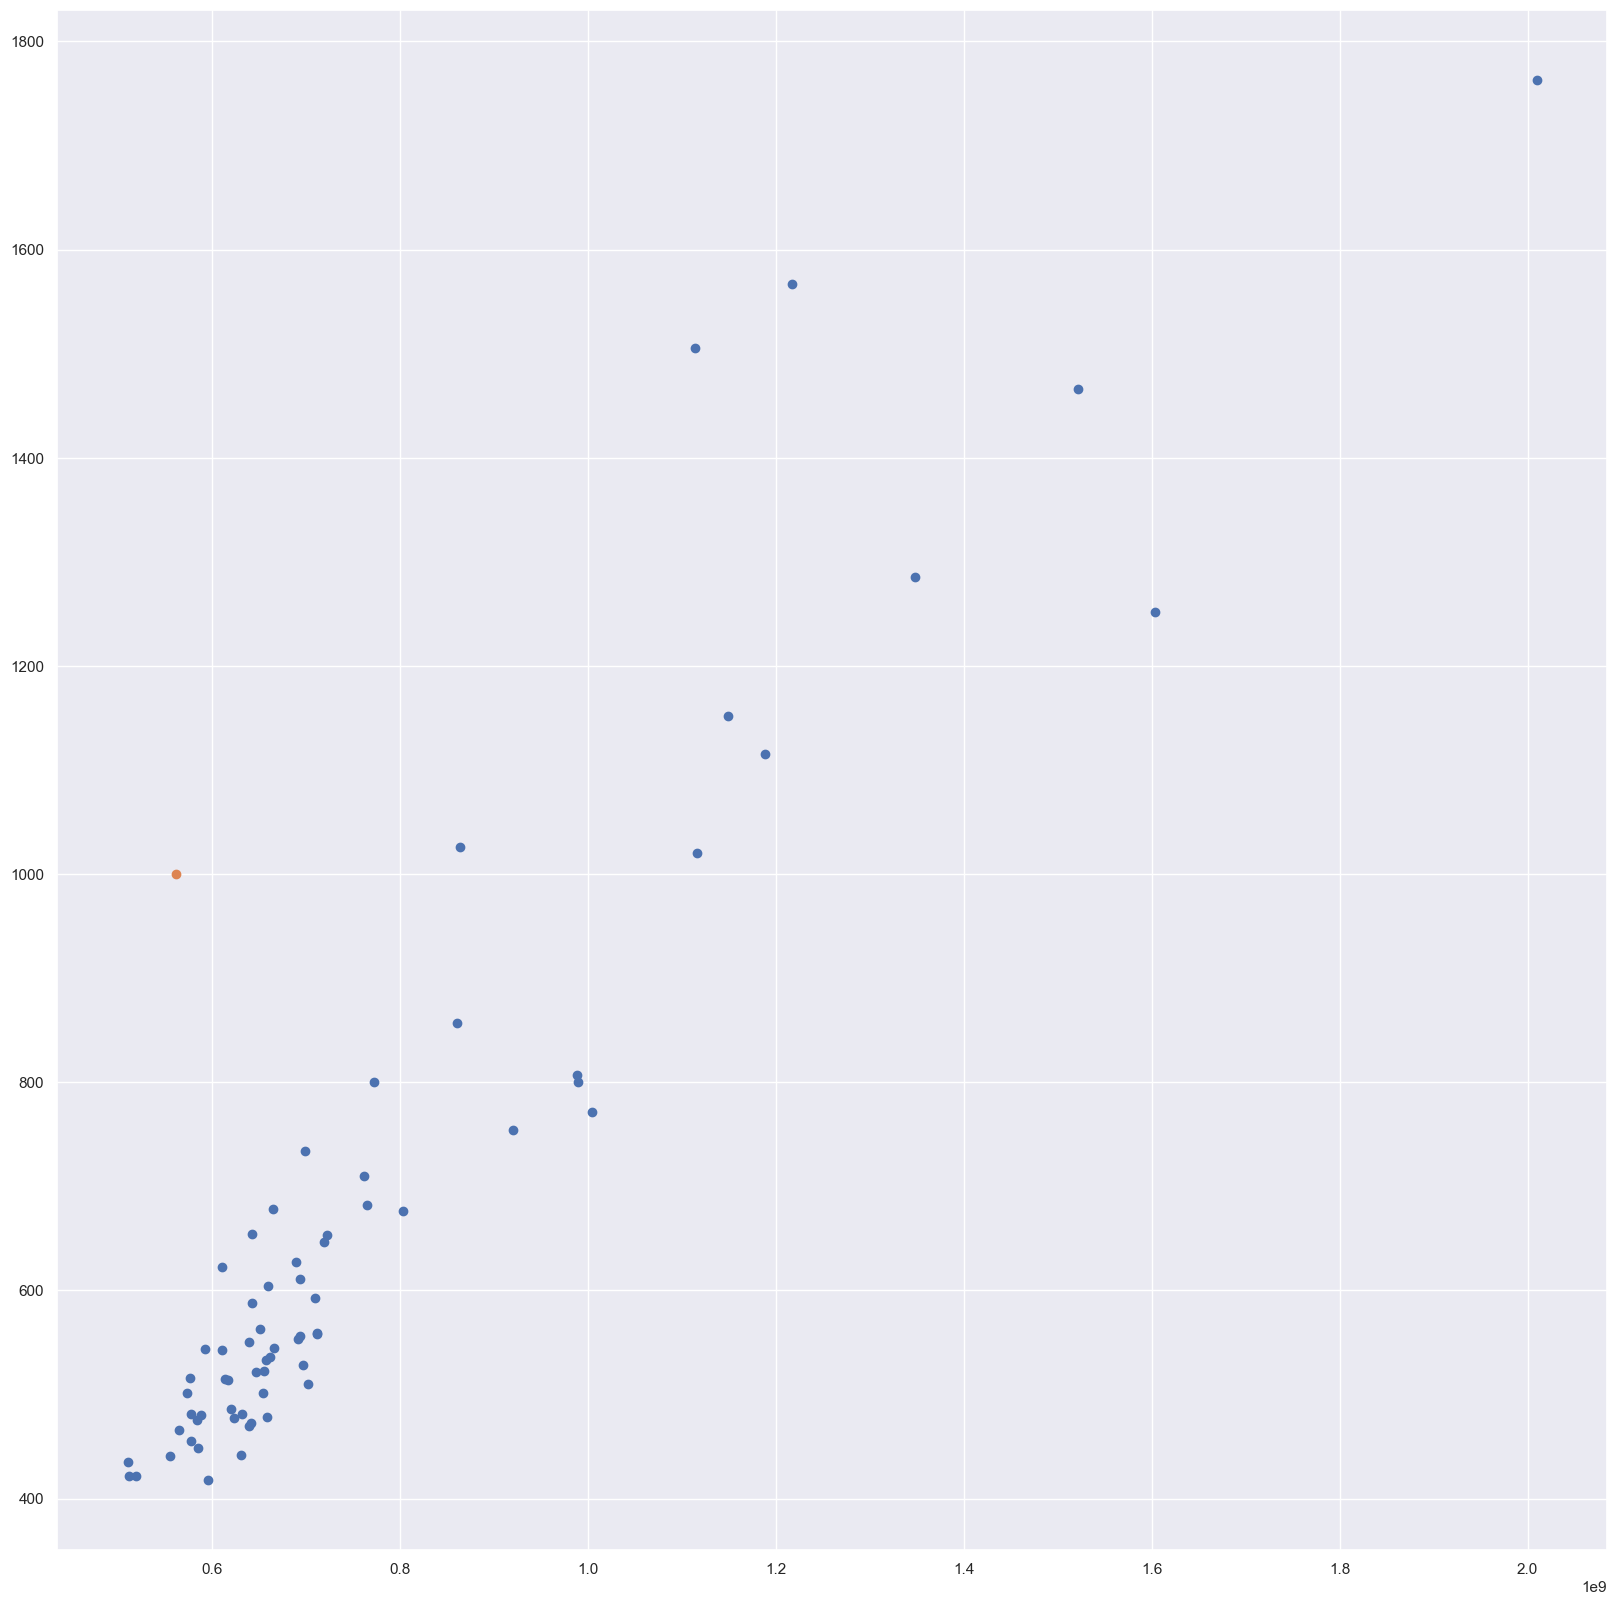

In [19]:
plt.scatter(regions_data['x9']*regions_data['x61'], regions_data['Y2'])
plt.scatter(regions_final_test_data.loc[16, 'x9']*regions_final_test_data.loc[16, 'x61'], [1000]*1)

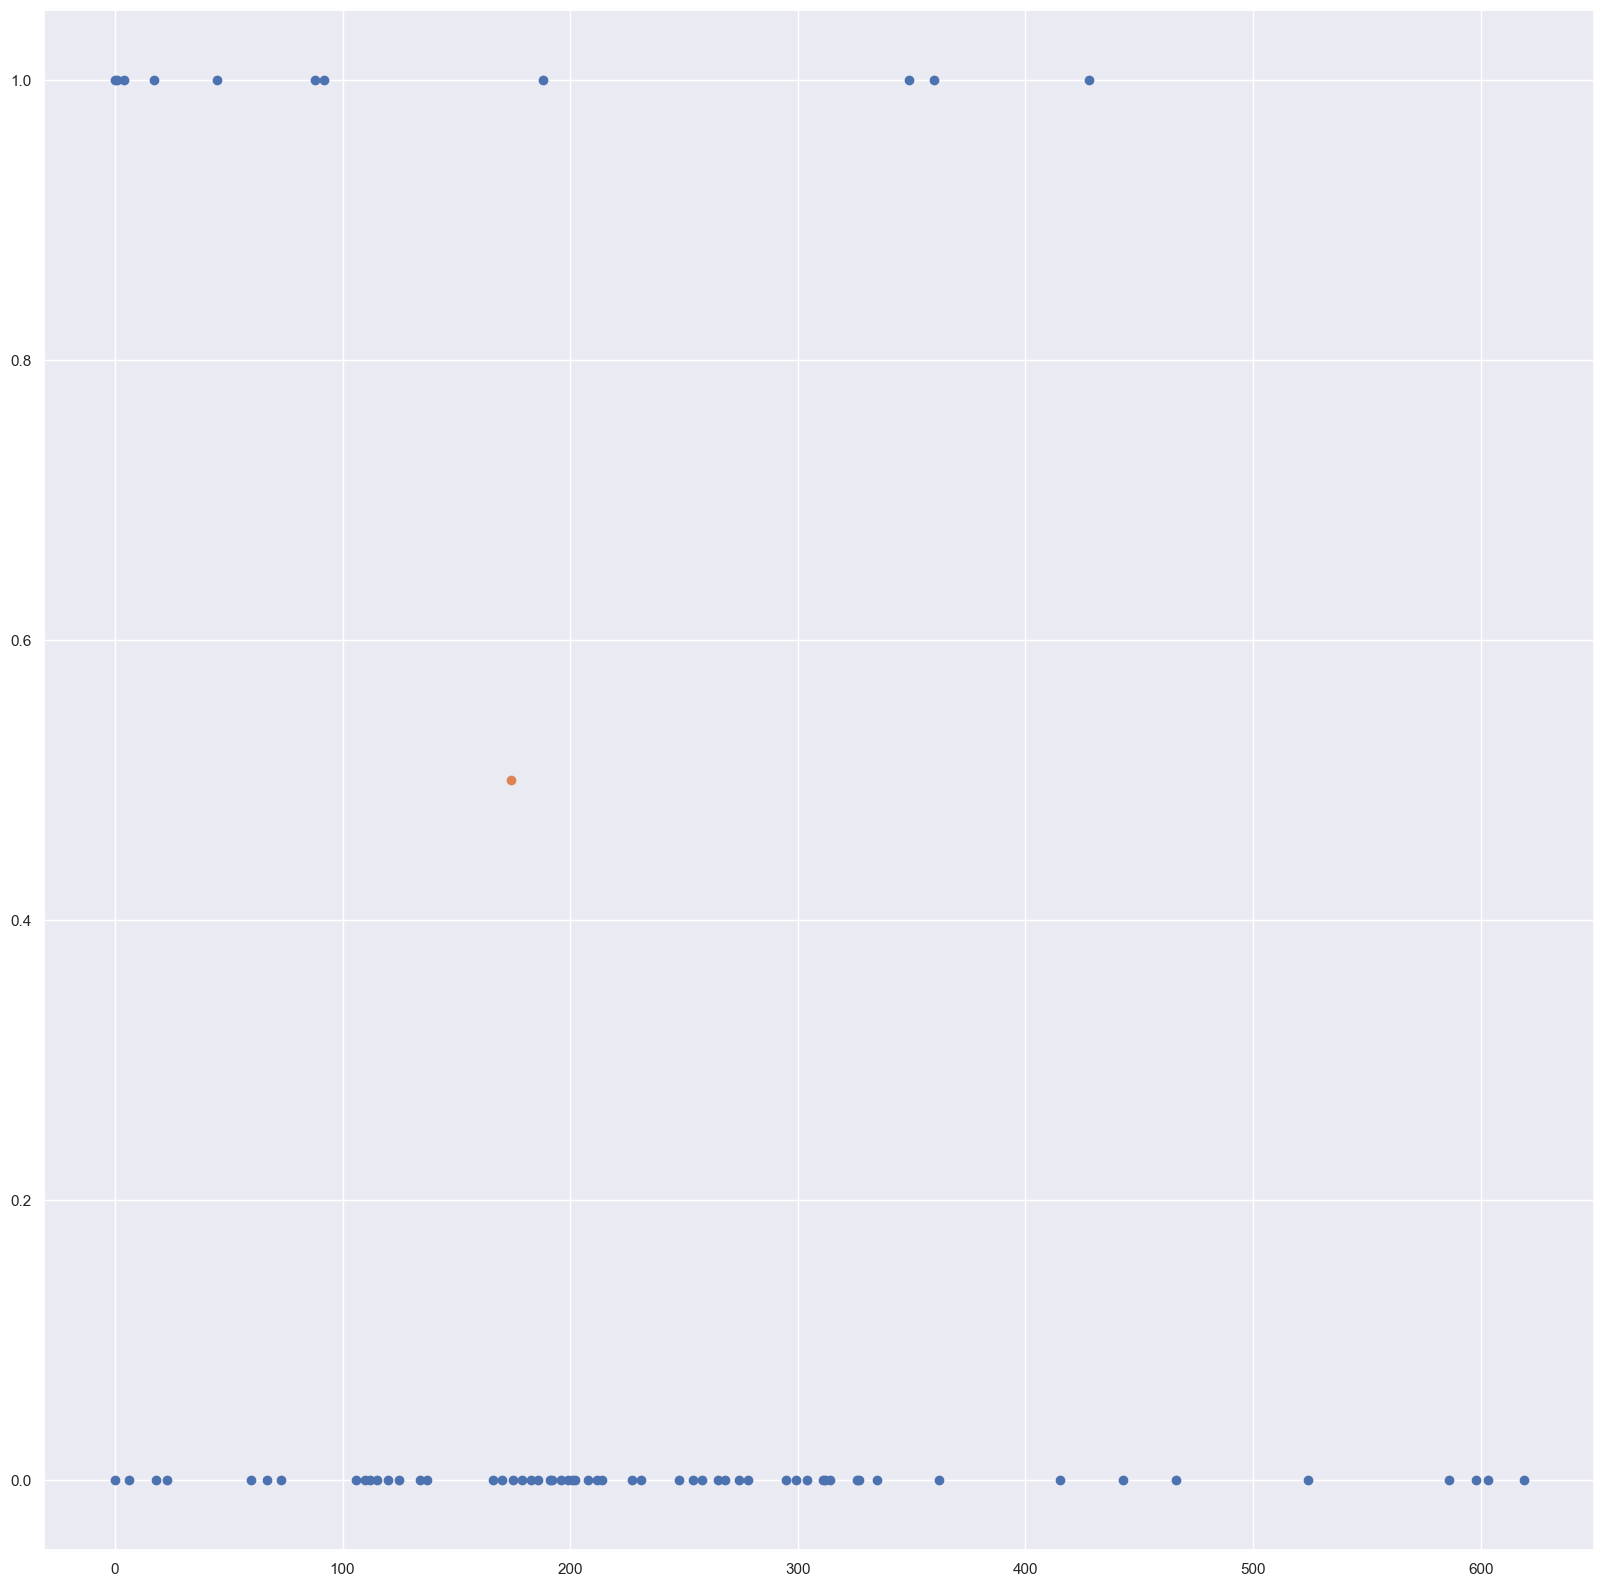

In [20]:
plt.scatter(regions_data['x34'], regions_data['Y1'])
plt.scatter(regions_final_test_data.loc[4,'x34'], [0.5]*1)

In [21]:
regions_final_test_data['x9']*regions_final_test_data['x61']

0     8.425948e+08
1     6.268141e+08
2     7.913650e+08
3     7.678779e+08
4     6.441570e+08
5     1.123414e+09
6     6.035379e+08
7     9.377680e+08
8     6.522509e+08
9     7.027637e+08
10    5.572898e+08
11    6.260817e+08
12    6.550575e+08
13    6.098678e+08
14    6.779045e+08
15    5.912059e+08
16    5.616266e+08
dtype: float64